# Problem statement

### The task is to train a machine learning model to predict wether a bank customer will churn (leave the bank) or not based on various attribute and banking behavior. The goal is to create a model that can accurately identify customer who are likely to chrun, enabling proactive retention stratergies.

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.shape

(10000, 14)

In [7]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [9]:

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Exploaratory DataAnalysis(EDA)

## Exited

In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

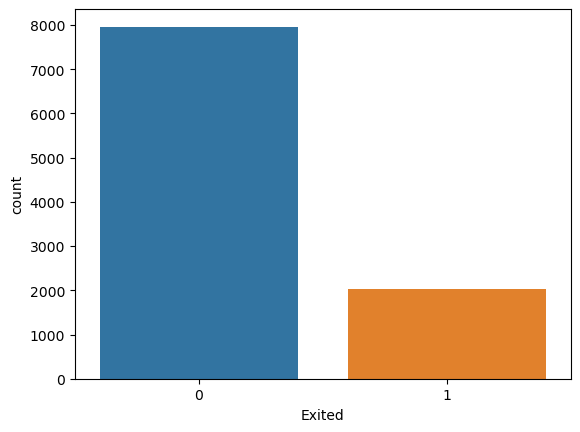

In [12]:
sns.countplot(df.Exited)

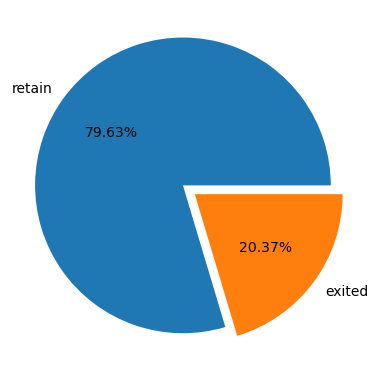

In [13]:
plt.pie(x=df.Exited.value_counts().values,labels=['retain','exited'],autopct = '%1.2f%%', explode=[0.1, 0])
plt.show()

## CreditScore

In [14]:
df.CreditScore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

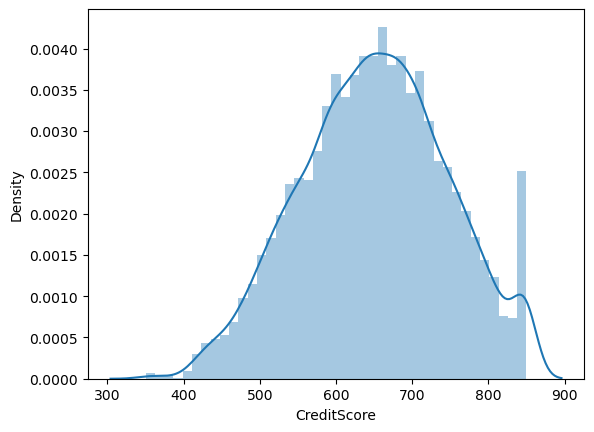

In [15]:
sns.distplot(df.CreditScore)

<AxesSubplot:xlabel='CreditScore'>

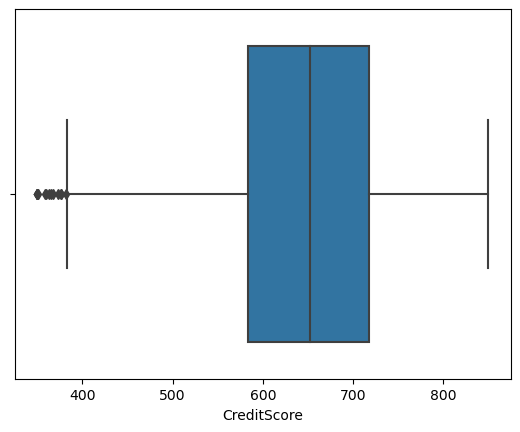

In [16]:
sns.boxplot(df.CreditScore)

In [17]:
q3=df.CreditScore.quantile(0.75)
q1=df.CreditScore.quantile(0.25)
iqr=q3-q1
lower=q1-(1.5*iqr)


In [18]:
df.CreditScore=np.where(df.CreditScore<lower,lower,df.CreditScore)

<AxesSubplot:xlabel='CreditScore'>

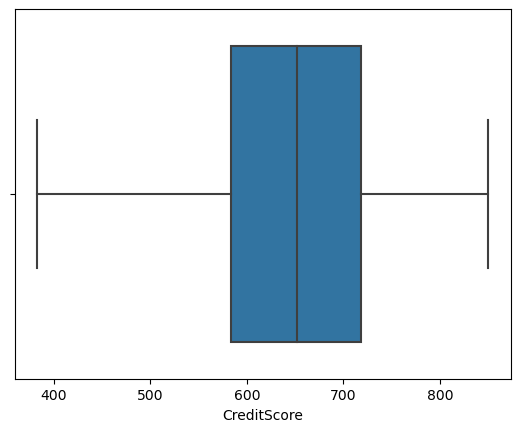

In [19]:
sns.boxplot(df.CreditScore)

## Geography

In [20]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

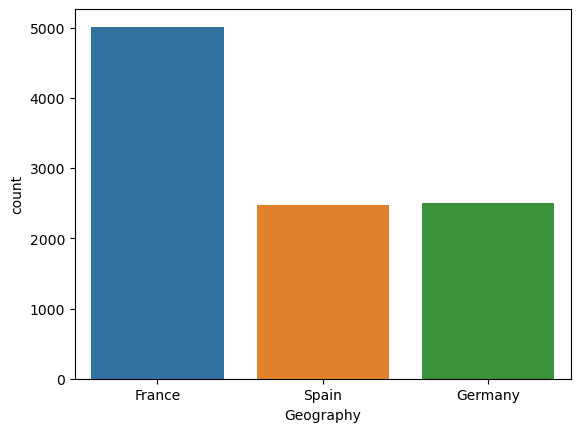

In [21]:
sns.countplot(df.Geography)

## Gender

In [22]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

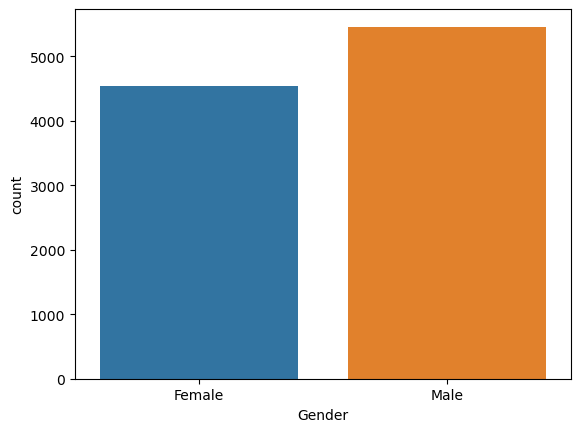

In [23]:
sns.countplot(df.Gender)

## Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

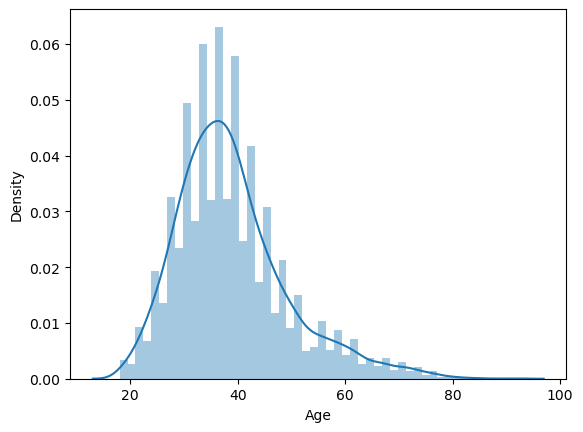

In [24]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age'>

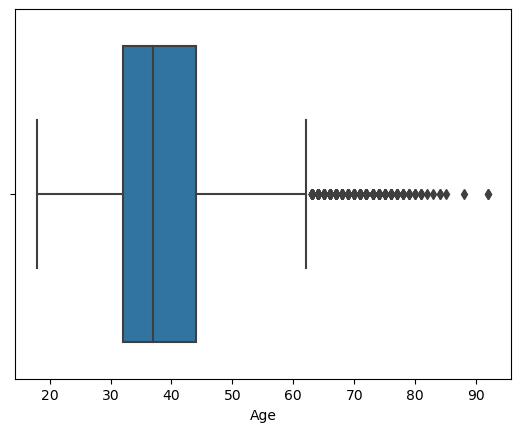

In [25]:
sns.boxplot(df.Age)

In [26]:
q3=df.Age.quantile(0.75)
q1=df.Age.quantile(0.25)
iqr=q3-q1


In [27]:
upper=q3+(1.5*iqr)
upper

62.0

In [28]:
df.Age=np.where(df.Age>upper,upper,df.Age)

<AxesSubplot:xlabel='Age'>

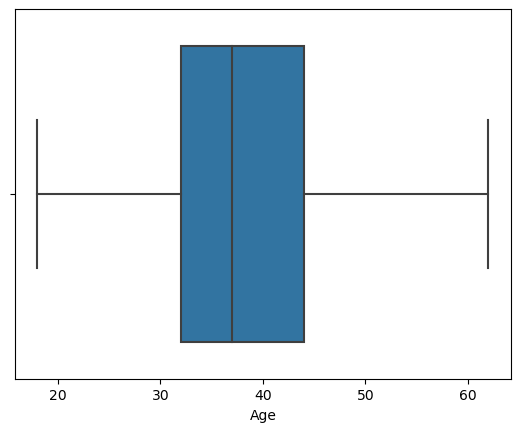

In [29]:
sns.boxplot(df.Age)

## Tenure

In [30]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='count'>

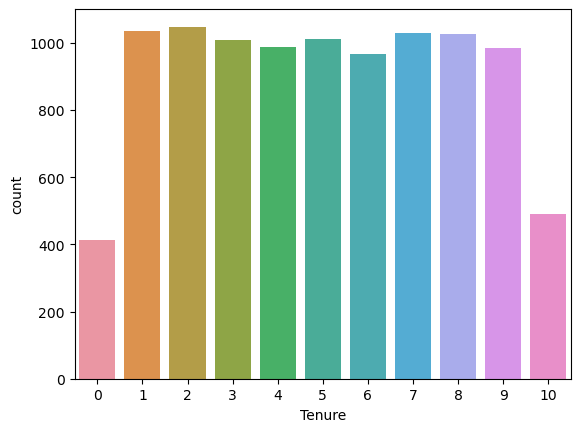

In [31]:
sns.countplot(df.Tenure)

## Balance

In [32]:
df.Balance.value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

<AxesSubplot:xlabel='Balance', ylabel='Density'>

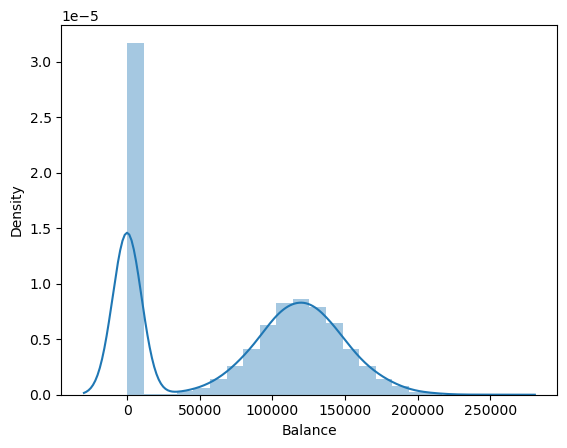

In [33]:
sns.distplot(df.Balance)

<AxesSubplot:xlabel='Balance'>

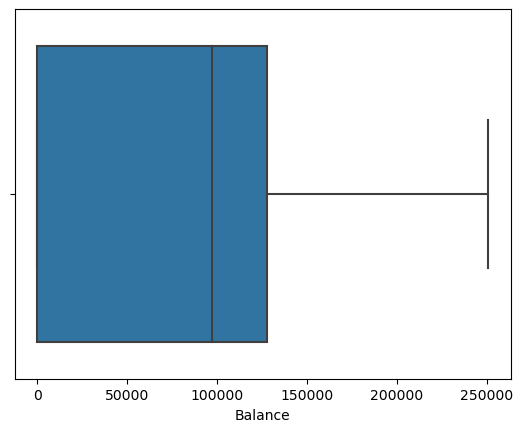

In [34]:
sns.boxplot(df.Balance)

## NumOfProducts

In [35]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

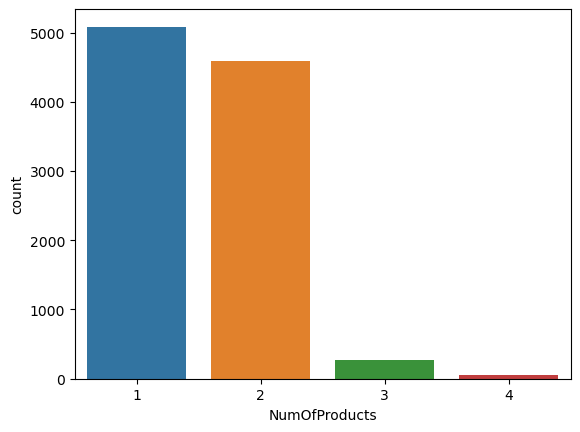

In [36]:
sns.countplot(df.NumOfProducts)

## HasCrCard

In [37]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

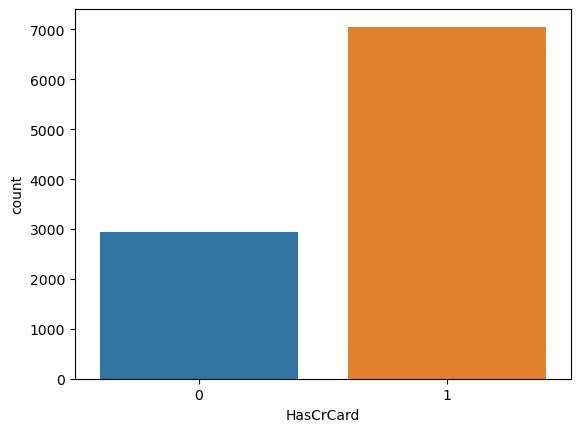

In [38]:
sns.countplot(df.HasCrCard)

## IsActiveMember

In [39]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

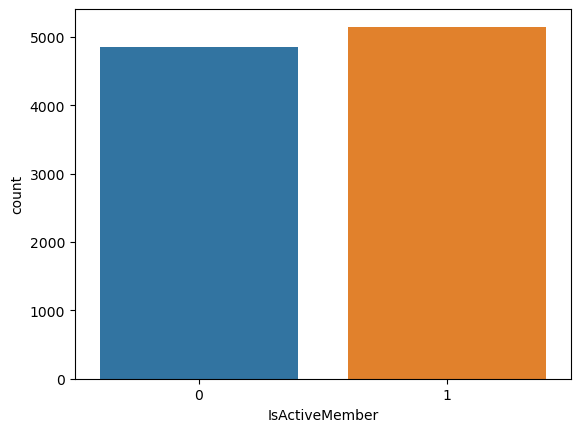

In [40]:
sns.countplot(df.IsActiveMember)

## EstimatedSalary

In [41]:
df.EstimatedSalary.value_counts()

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: EstimatedSalary, Length: 9999, dtype: int64

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

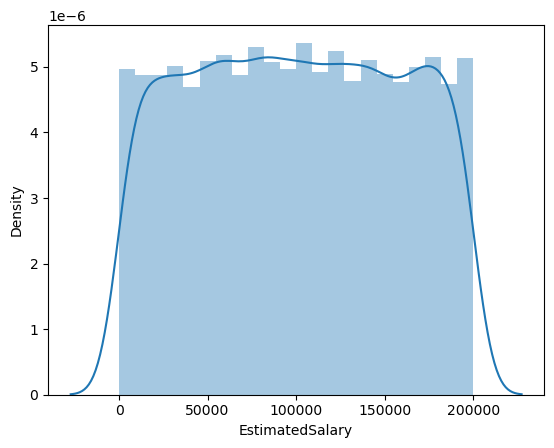

In [42]:
sns.distplot(df.EstimatedSalary)

<AxesSubplot:xlabel='EstimatedSalary'>

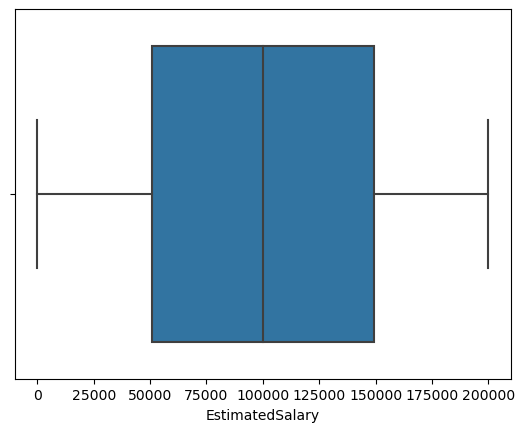

In [43]:
sns.boxplot(df.EstimatedSalary)

In [44]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,645.0,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
6,822.0,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,383.0,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,501.0,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,684.0,France,Male,27.0,2,134603.88,1,1,1,71725.73,0


In [45]:
num_col=df.select_dtypes(include=np.number)


<AxesSubplot:>

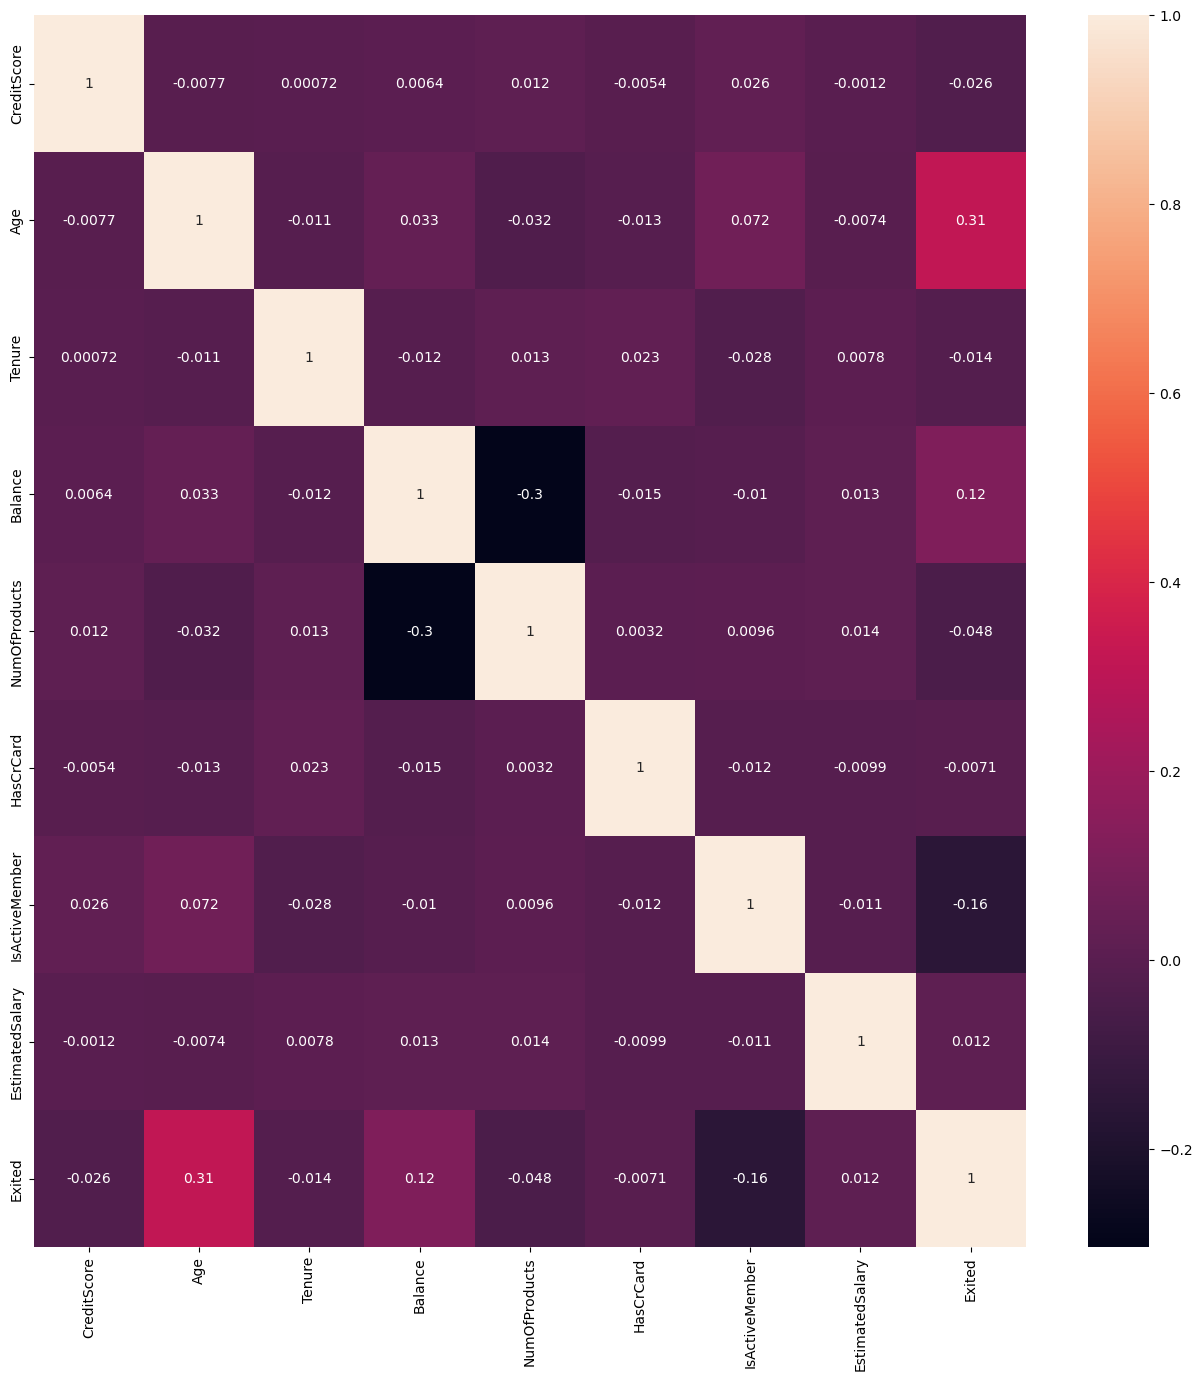

In [46]:
plt.figure(figsize=(16,16))
sns.heatmap(num_col.corr(),annot=True)

# VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif_da=num_col
vif_data=pd.DataFrame()
vif_data['Features']=vif_da.columns
vif_data['VIF']=[variance_inflation_factor(vif_da.values,i) for i in range(len(vif_da.columns))]
print(vif_data)

          Features        VIF
0      CreditScore  21.384986
1              Age  15.192389
2           Tenure   3.870238
3          Balance   2.656101
4    NumOfProducts   7.733091
5        HasCrCard   3.289345
6   IsActiveMember   2.146496
7  EstimatedSalary   3.889045
8           Exited   1.456753


In [49]:
num_col.drop(['CreditScore','Age'],inplace=True,axis=1)

In [50]:
vif_da=num_col
vif_data=pd.DataFrame()
vif_data['Features']=vif_da.columns
vif_data['VIF']=[variance_inflation_factor(vif_da.values,i) for i in range(len(vif_da.columns))]
print(vif_data)

          Features       VIF
0           Tenure  3.481944
1          Balance  2.254423
2    NumOfProducts  4.925817
3        HasCrCard  3.021991
4   IsActiveMember  1.981699
5  EstimatedSalary  3.521361
6           Exited  1.285375


In [51]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
df.Gender=le.fit_transform(df.Gender)

In [55]:
df.Geography=le.fit_transform(df.Geography)

In [56]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,2,0,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39.0,5,0.00,2,1,0,96270.64,0
9996,516.0,0,1,35.0,10,57369.61,1,1,1,101699.77,0
9997,709.0,0,0,36.0,7,0.00,1,0,1,42085.58,1
9998,772.0,1,1,42.0,3,75075.31,2,1,0,92888.52,1


## Smote

In [57]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [58]:
from sklearn.utils import resample

In [59]:
no=df[df.Exited==0]
yes=df[df.Exited==1]

over=resample(yes,replace=True,n_samples=len(no),random_state=23)

dfsmote=pd.concat([no,over])


In [60]:
dfsmote.Exited.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [64]:
y=dfsmote['Exited']
x=dfsmote.drop('Exited',axis=1)




In [72]:
from sklearn.metrics import classification_report,roc_curve,auc,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

## LogisticRegression

In [67]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [68]:
pred=lr.predict(xtest)

In [69]:
accuracy_score(ytest,pred)

0.662411050648807

In [70]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      2419
           1       0.65      0.68      0.67      2359

    accuracy                           0.66      4778
   macro avg       0.66      0.66      0.66      4778
weighted avg       0.66      0.66      0.66      4778



In [71]:
confusion_matrix(ytest,pred)

array([[1552,  867],
       [ 746, 1613]], dtype=int64)

In [73]:
prob=lr.predict_proba(xtest)

In [74]:
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc=auc(fp,tp)
print(roc_auc)

0.710421821313219


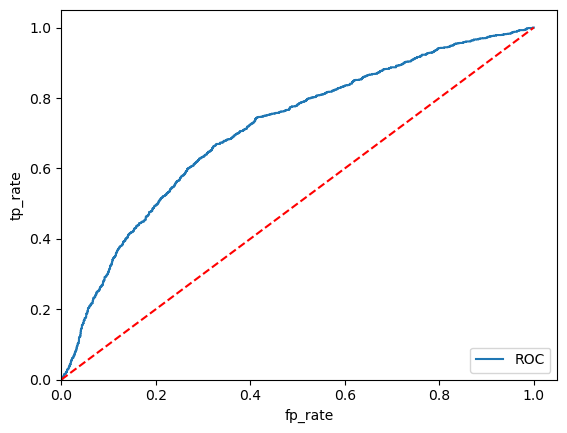

In [75]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [93]:
params={
    'max_features':['sqrt',0.25],
    'min_samples_split':[6,10,12],
    'max_depth': [10,15,20],
    'n_estimators':[500,600]}

In [94]:
gd=GridSearchCV(rf,params)

In [95]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(max_depth=8, min_samples_split=4,
                                              n_estimators=500,
                                              random_state=30),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['sqrt', 0.25],
                         'min_samples_split': [6, 10, 12],
                         'n_estimators': [500, 600]})

In [96]:
gd.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=6, n_estimators=500,
                       random_state=30)

In [89]:
rf=RandomForestClassifier(random_state=30,max_depth=8, min_samples_split=4, n_estimators=500)
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=8, min_samples_split=4, n_estimators=500,
                       random_state=30)

In [78]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [90]:
Y_pred=rf.predict(xtest)

In [91]:
confusion_matrix(ytest,Y_pred)

array([[2004,  415],
       [ 516, 1843]], dtype=int64)

In [92]:
accuracy_score(ytest,Y_pred)

0.80514859773964